In [99]:
# tools for data explanation and visualization
import shap
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import sklearn.metrics as metrics
# tools for data manipulation and munging
import pandas as pd
import numpy as np
# tools that create regression models 
from sklearn.model_selection import train_test_split

In [100]:
df = pd.read_csv(r'.\Cancer_Data.csv')
# analysis of data data 
print(f"shape of data: {df.shape}\ncolumns of data: {df.columns}\n\n\nnow, based on the data as seen from data header and the columns we will select the column that would be our target column ")
df.head(20)

shape of data: (569, 33)
columns of data: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


now, based on the data as seen from data header and the columns we will select the column that would be our target column 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


(357, 33)
(212, 33)


<AxesSubplot: >

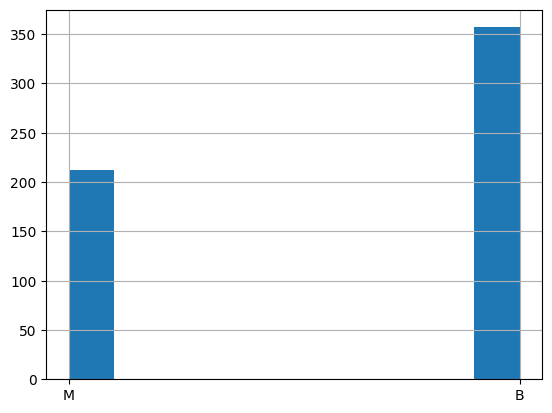

In [101]:
# analysing the output parameter
print(df[df['diagnosis']=='B'].shape)
print(df[df['diagnosis']=='M'].shape)
# well yes in this case the data for benile and melignnat is fine so we need not develop synthetic data as the real ata is balanced in the first place
df['diagnosis'].hist()

let's just clear our data and covert all string to float or int and jump into the coding

In this notebook we have code for advanced tree based classifier like :
- RandomForest
- XGBoost
- SVM's

also,
we will discuss the use of **DNN** and **Dense nets** for tabular data classification

In [102]:
# we can use this to one hot encode all the values of tables in pandas from string to lable int
def munging(df):
    for i in df.columns:
        if(df[i].dtype== 'O'):
            print(f'replacing: {df[i].unique()}, to: {[i for i in range( len(df[i].unique()))]}')
            df.replace(df[i].unique(),[i for i in range( len(df[i].unique()))],inplace=True)
    return df

data = munging(df)

replacing: ['M' 'B'], to: [0, 1]


In [103]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [104]:
#shuffeling the data to get a little randomization
del data[data.columns[-1]]
data=data.sample(frac=1).reset_index(drop=True)
x=data.copy()
y=x[data.columns[1]]
del x[data.columns[1]]

In [105]:
#as you can see the data is shuffled
x,y

(          id  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0     865137        11.41         10.82           73.34      403.3   
 1     919812        11.69         24.44           76.37      406.4   
 2     914062        18.01         20.56          118.40     1007.0   
 3     865468        13.37         16.39           86.10      553.5   
 4    8712853        14.97         16.95           96.22      685.9   
 ..       ...          ...           ...             ...        ...   
 564  9110944        14.80         17.66           95.88      674.8   
 565  8912521        12.58         18.40           79.83      489.0   
 566   925292        14.05         27.15           91.38      600.4   
 567  8610175        12.31         16.52           79.19      470.9   
 568   897374        12.30         19.02           77.88      464.4   
 
      smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0            0.09373           0.06685        0.035120           

In [106]:
# splitting the data into test and train samples
xtrain , xtest , ytrain , ytest= train_test_split(x,y,test_size=0.2)

In [107]:
print(f"xtrain : {xtrain.shape}")
print(f"xtest : {xtest.shape}")
print(f"ytrain : {ytrain.shape[0]}")
print(f"ytest : {ytest.shape[0]}")

xtrain : (455, 31)
xtest : (114, 31)
ytrain : 455
ytest : 114


we can also get the data as a parameterized text output using the sklearn metrics function that generates results like:
-  explained variance
-  accuracy score
-  mean squared log error
-  r2
-  Mean Absolute Error
-  Mean Standard Error
-  Root Mean Square Error
-  F1 score

In [108]:
def regression_results(y_true, y_pred):

    # Regression metrics
    acc = metrics.accuracy_score(y_true,y_pred)
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    f1 = metrics.f1_score(y_true,y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('accuracy: ', round(acc,4))
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('f1: ', round(f1,4))

**RandomForestRegressor**

In [109]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)

RandomForestRegressor()

**XGBoost Algorithm**

In [111]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

In [112]:
rfxgb = RFE(XGBClassifier(n_jobs=-1, random_state=1))
rfxgb.fit(xtrain, ytrain)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=-1, num_parallel_tree=None, predictor=None,
                            random_state=1, ...))

**Adaboost Algorithm**

In [144]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=1)
ada.fit(xtrain, ytrain)

AdaBoostClassifier(random_state=1)

**GradientBoosting Algorithm**

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(max_depth=5, learning_rate=0.01,random_state=1)
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, random_state=1)

**ANALYSIS OF TREE BASE ALGORITHM**

**ANALYSIS OF RANDOM FOREST ALGORITHM**

In [113]:
pred= rfr.predict(xtest)
result = np.where(pred<0.5, 0,1)

<AxesSubplot: >

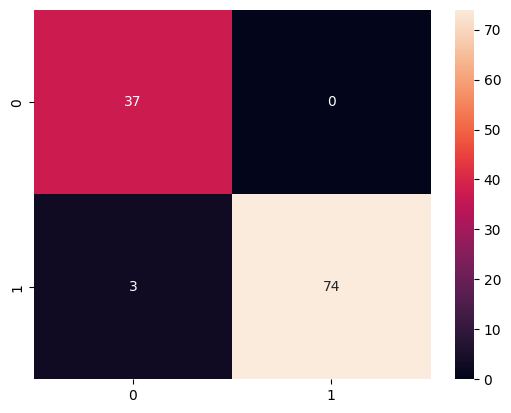

In [114]:
# generating a visual analysis of predictions using confusion matrix and seaborn library to generate matrix and heatmaps respectively
res = confusion_matrix(result,ytest)
sns.heatmap(res, annot=True, fmt='g')

In [115]:
regression_results(ytest,result)

accuracy:  0.9737
explained_variance:  0.8875
mean_squared_log_error:  0.0126
r2:  0.8845
MAE:  0.0263
MSE:  0.0263
RMSE:  0.1622
f1:  0.9801


In [117]:
explainer = shap.Explainer(rfr,xtest)
shap_values_rfr = explainer(xtest)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


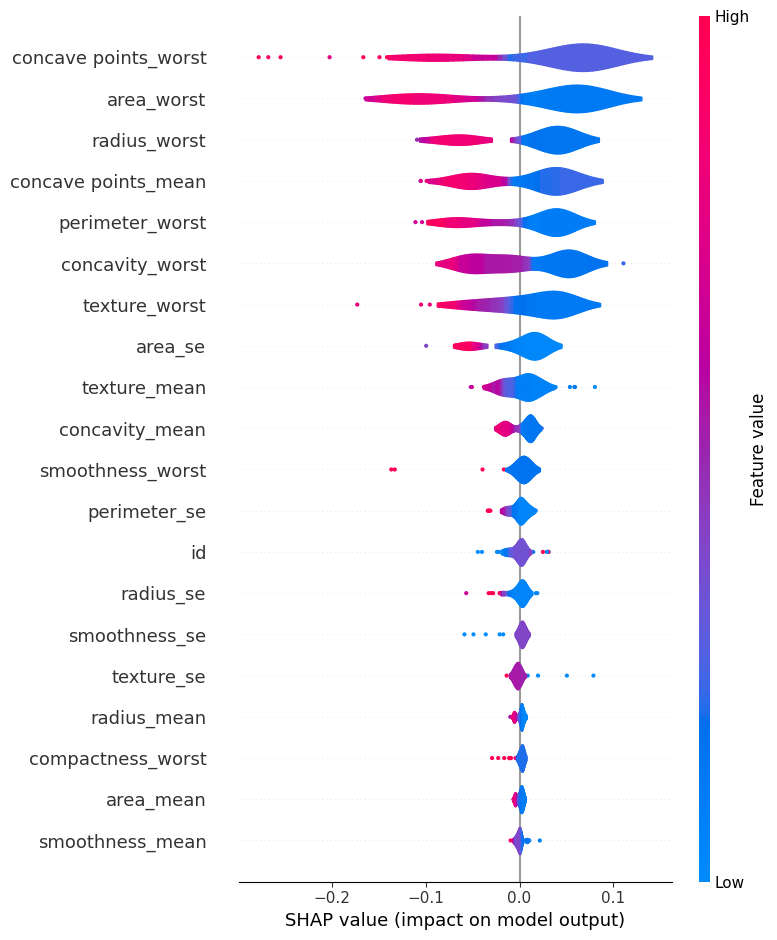

In [118]:
# this is a plot of the datapoints of shap model that explains the role of each feature on y-axis
# and its affects on the model's predicted value where red is high feature value and blue is low feature value that negatively or positively affects the prediction of the model
shap.summary_plot(shap_values_rfr,plot_type='violin')

In [119]:
# this block is printing the values of feature importance that is extracted from the shap analysis of the data 
n=0
for i in rfr.feature_importances_:
    print(f'{df.columns[n]}\t:{i}')
    n+=1

id	:0.009101087608617395
diagnosis	:0.001302999197002572
radius_mean	:0.015740763376214
texture_mean	:0.0022489375294457276
perimeter_mean	:0.002553733436723319
area_mean	:0.004079689221509562
smoothness_mean	:0.0014545743186246925
compactness_mean	:0.0036768422271402576
concavity_mean	:0.21420438098770606
concave points_mean	:0.002307024107306854
symmetry_mean	:0.002440347916436673
fractal_dimension_mean	:0.003481141776738617
radius_se	:0.0041723291274559345
texture_se	:0.0036377164598623475
perimeter_se	:0.015915560893344862
area_se	:0.0025457363594113156
smoothness_se	:0.002641393100827689
compactness_se	:0.0019099056689269778
concavity_se	:0.0010337632256205
concave points_se	:0.0027761999020127484
symmetry_se	:0.004631035264355147
fractal_dimension_se	:0.09975941085436885
radius_worst	:0.029047540905880798
texture_worst	:0.14217279018852294
perimeter_worst	:0.16204313590268085
area_worst	:0.011610555012359676
smoothness_worst	:0.003001377889574341
compactness_worst	:0.012951738650

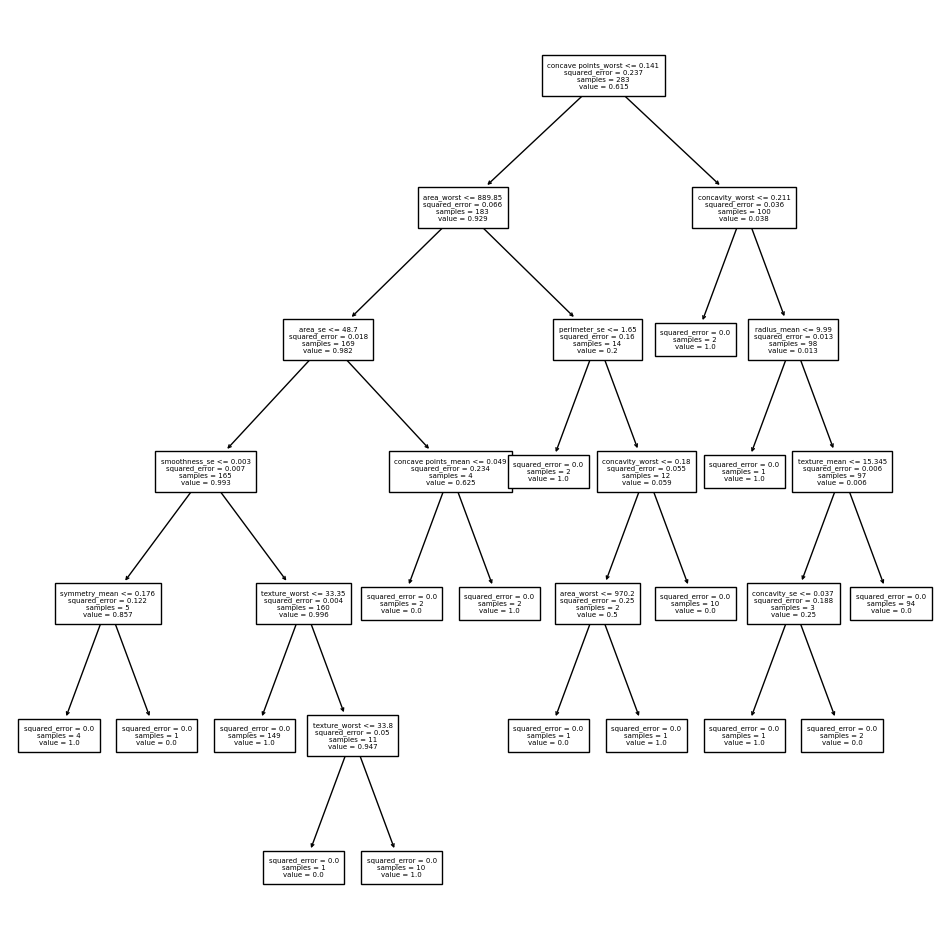

In [177]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plot_tree(rfr.estimators_[5], feature_names = x.columns,class_names=['Disease', "No Disease"],fontsize=5)
plt.show
plt.savefig('./random forest/tree',dpi=300)

**ANALYSIS OF RF-XGBOOST ALGORITHM**

In [121]:
pred= rfxgb.predict(xtest)
result = np.where(pred<0.5, 0,1)

In [122]:
# Fits the explainer
explainer = shap.Explainer(rfxgb.predict, xtest)
# Calculates the SHAP values - It takes some time
shap_values_xgb = explainer(xtest)

<AxesSubplot: >

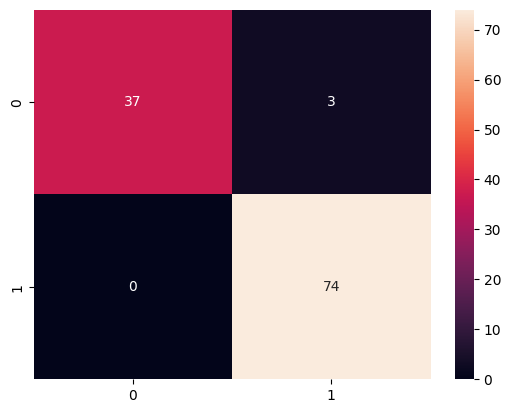

In [123]:
cf_mat= confusion_matrix(np.array( ytest),result)
sns.heatmap(cf_mat, annot=True)

In [124]:
regression_results(ytest,result)

accuracy:  0.9737
explained_variance:  0.8875
mean_squared_log_error:  0.0126
r2:  0.8845
MAE:  0.0263
MSE:  0.0263
RMSE:  0.1622
f1:  0.9801


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


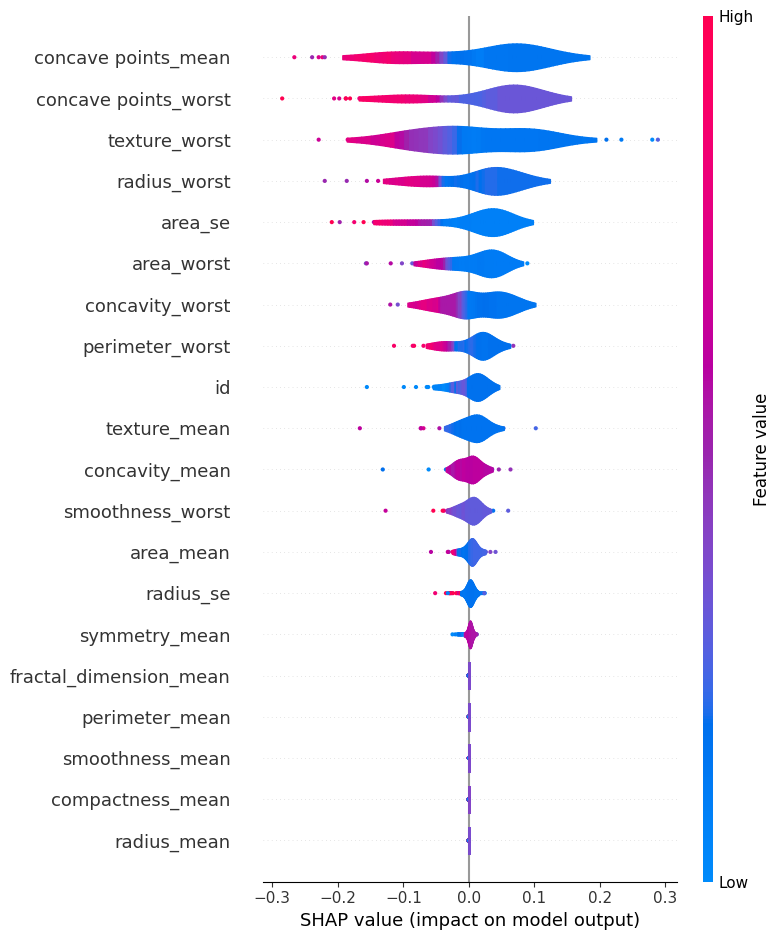

In [125]:
shap.summary_plot(shap_values_xgb,plot_type='violin')

**ANALYSIS OF ADABOOST ALGORITHM**

In [145]:
pred= ada.predict(xtest)
result = np.where(pred<0.5, 0,1)

In [147]:
# Fits the explainer
explainer = shap.Explainer(ada.predict, xtest)
# Calculates the SHAP values - It takes some time
shap_values_xgb = explainer(xtest)

Permutation explainer: 115it [00:47,  1.97it/s]                         


<AxesSubplot: >

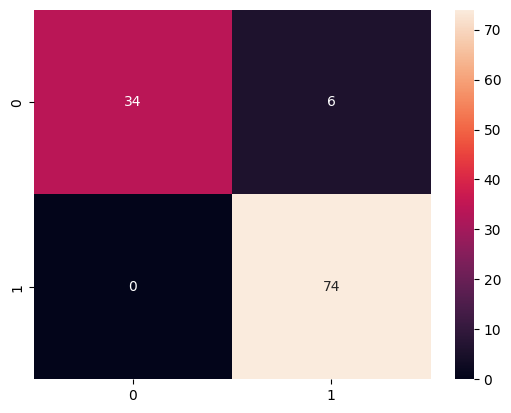

In [148]:
cf_mat= confusion_matrix(np.array( ytest),result)
sns.heatmap(cf_mat, annot=True)

In [149]:
regression_results(ytest,result)

accuracy:  0.9474
explained_variance:  0.7811
mean_squared_log_error:  0.0253
r2:  0.7689
MAE:  0.0526
MSE:  0.0526
RMSE:  0.2294
f1:  0.961


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


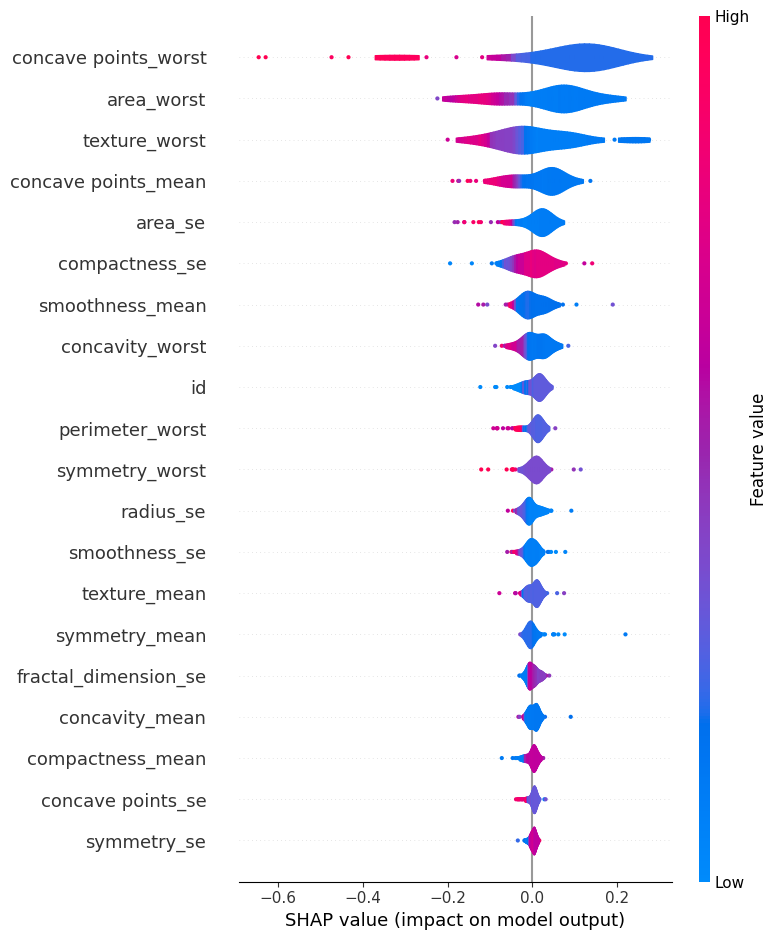

In [150]:
shap.summary_plot(shap_values_xgb,plot_type='violin')

we can see that this model have generated decision tree for each single feature of the table and giving it an importance value . Based on these values the new models are trained and by adaptively merging the weak learners and  strong learners to get a final tree with strong classification value

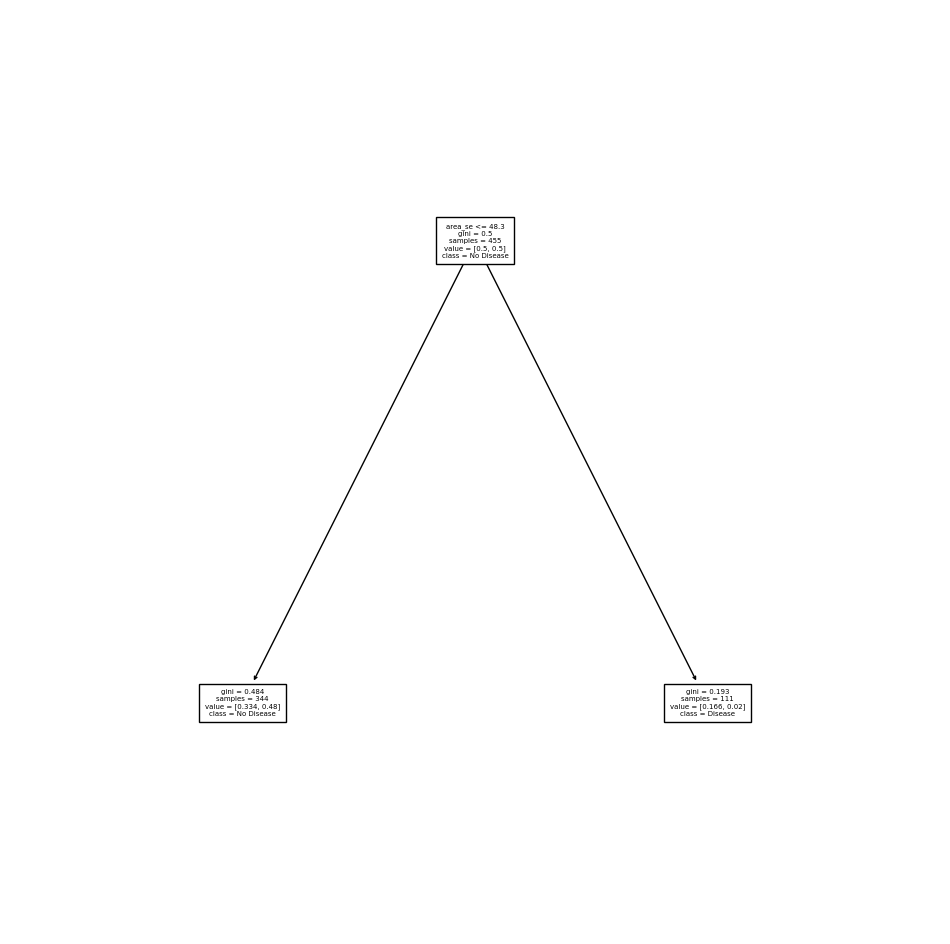

In [170]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i in range(len(x.columns)):
    plot_tree(ada.estimators_[i], feature_names = x.columns,class_names=['Disease', "No Disease"],fontsize=5)
    plt.show
    plt.savefig(f'./adaptive tree/ada tree{i}',dpi=300)

**ANALYSIS OF GRADIENTBOOST ALGORITHM**

in this case the error is calculated along the model formation and based on the error the split is initiated for the decision tree

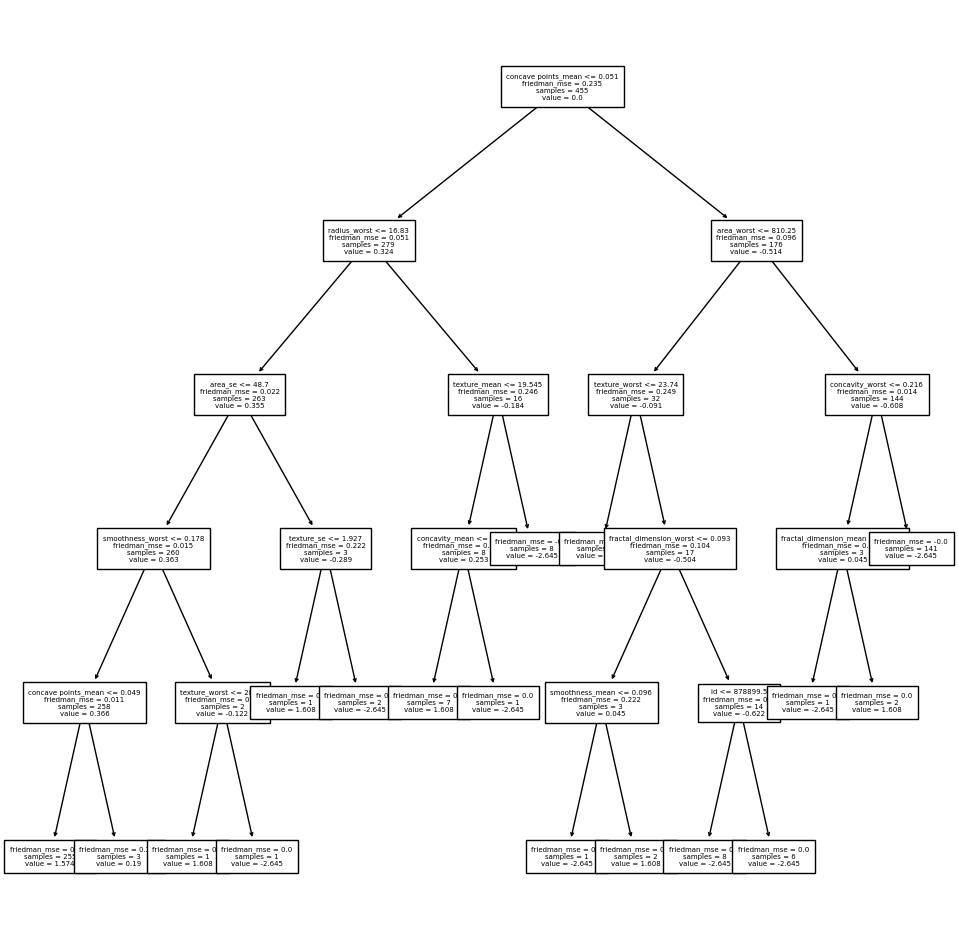

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plot_tree(gbc.estimators_[0][0], feature_names = x.columns,class_names=['Disease', "No Disease"],fontsize=5)
plt.show
plt.savefig('./gcb tree/gcb tree',dpi=300)

In [183]:
inp=[[855563,10.95,21.35,71.9,371.1,0.1227,0.1218,0.1044,0.05669,0.1895,0.0687,0.2366,1.428,1.822,16.97,0.008064,0.01764,0.02595,0.01037,0.01357,0.00304,12.84,35.34,87.22,514,0.1909,0.2698,0.4023,0.1424,0.2964,0.09606]]
rfr.predict(inp)
ada.predict(inp)
# x.columns

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but AdaBoostClassifier was fitted with feature names


array([0], dtype=int64)